In [49]:
import cv2 as cv
import matplotlib.pyplot as plt
import sys
import numpy as np

# a) Área

Valor bruto de M['m00']: 1797750.0
---
a. Área do Objeto: 7050 pixels
---


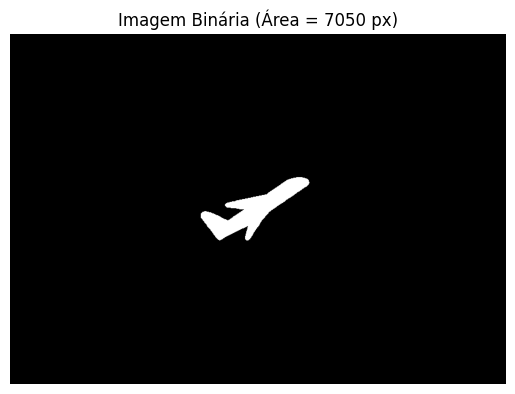

In [50]:
img = cv.imread('aviao_ed.png', cv.IMREAD_GRAYSCALE)

ret, img_binaria = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

M = cv.moments(img_binaria)

area = M['m00']

print(f"Valor bruto de M['m00']: {area}")

area_pixels = area / 255.0

print(f"---")
print(f"a. Área do Objeto: {area_pixels:.0f} pixels")
print(f"---")

plt.imshow(img_binaria, cmap='gray')
plt.title(f"Imagem Binária (Área = {area_pixels:.0f} px)")
plt.axis('off')
plt.show()

# b) Centroide

b. Centróide encontrado em: (x=421, y=306)


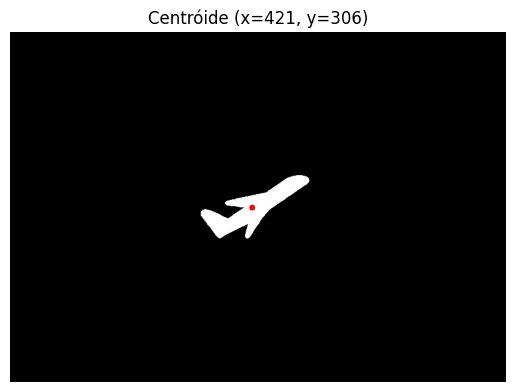

In [51]:
if M['m00'] != 0:
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    print(f"b. Centróide encontrado em: (x={cx}, y={cy})")
else:
    cx, cy = 0, 0
    print("Erro: Área é zero, impossível calcular centróide.")

img_centroide = cv.cvtColor(img_binaria, cv.COLOR_GRAY2BGR)

cv.circle(img_centroide, (cx, cy), 5, (255, 0, 0), -1)

plt.imshow(img_centroide)
plt.title(f"Centróide (x={cx}, y={cy})")
plt.axis('off')
plt.show()

# C) Momento central e Matriz de inércia
# D) Uma elipse equivalente

      RESULTADOS DA ANÁLISE
a. Área (M00): 1797750
----------------------------------------
b. Centróide: (x=421, y=306)
----------------------------------------
c. Momentos Centrais:
   mu20: 3883280723.87
   mu02: 1311002481.94
   mu11: -1807665229.89

   Matriz de Inércia:
[[ 3.88328072e+09 -1.80766523e+09]
 [-1.80766523e+09  1.31100248e+09]]
----------------------------------------
d. Elipse Equivalente:
   Eixo Maior: 207.03 pixels
   Eixo Menor: 58.05 pixels
   Excentricidade: 0.9599
----------------------------------------
e. Orientação: -27.28 graus


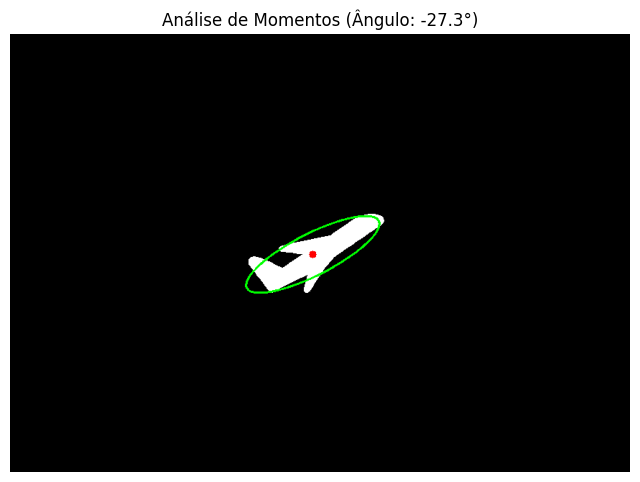

In [52]:
img = cv.imread('aviao_ed.png', cv.IMREAD_GRAYSCALE)
if img is None:
    print("Erro: Imagem não encontrada.")
else:
    ret, img_binaria = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

    M = cv.moments(img_binaria)

    if M['m00'] > 0:

        area = M['m00']

        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])

        mu20 = M['mu20']
        mu02 = M['mu02']
        mu11 = M['mu11']

        #matriz de Inércia
        matriz_inercia = np.array([[mu20, mu11], [mu11, mu02]])

        mu20_n = mu20 / area
        mu02_n = mu02 / area
        mu11_n = mu11 / area

        delta = np.sqrt((mu20_n - mu02_n)**2 + 4 * mu11_n**2)
        lambda1 = (mu20_n + mu02_n + delta) / 2
        lambda2 = (mu20_n + mu02_n - delta) / 2

        eixo_maior = 4 * np.sqrt(lambda1)
        eixo_menor = 4 * np.sqrt(lambda2)
        excentricidade = np.sqrt(1 - lambda2/lambda1)
        theta_rad = 0.5 * np.arctan2(2 * mu11_n, mu20_n - mu02_n)
        theta_deg = np.degrees(theta_rad)

        print("="*40)
        print("      RESULTADOS DA ANÁLISE")
        print("="*40)
        print(f"a. Área (M00): {area:.0f}")
        print("-" * 40)
        print(f"b. Centróide: (x={cx}, y={cy})")
        print("-" * 40)
        print("c. Momentos Centrais:")
        print(f"   mu20: {mu20:.2f}")
        print(f"   mu02: {mu02:.2f}")
        print(f"   mu11: {mu11:.2f}")
        print("\n   Matriz de Inércia:")
        print(matriz_inercia)
        print("-" * 40)
        print("d. Elipse Equivalente:")
        print(f"   Eixo Maior: {eixo_maior:.2f} pixels")
        print(f"   Eixo Menor: {eixo_menor:.2f} pixels")
        print(f"   Excentricidade: {excentricidade:.4f}")
        print("-" * 40)
        print(f"e. Orientação: {theta_deg:.2f} graus")
        print("="*40)

        img_plot = cv.cvtColor(img_binaria, cv.COLOR_GRAY2BGR)

        cv.circle(img_plot, (cx, cy), 5, (0, 0, 255), -1)

        axes = (int(eixo_maior / 2), int(eixo_menor / 2))
        cv.ellipse(img_plot, (cx, cy), axes, theta_deg, 0, 360, (0, 255, 0), 2)

        plt.figure(figsize=(8, 8))
        plt.imshow(cv.cvtColor(img_plot, cv.COLOR_BGR2RGB))
        plt.title(f"Análise de Momentos (Ângulo: {theta_deg:.1f}°)")
        plt.axis('off')
        plt.show()

    else:
        print("Erro: Área zero.")

# E) Orientação do objeto

In [53]:
img = cv.imread('aviao_ed.png', cv.IMREAD_GRAYSCALE)
if img is None:
    sys.exit("Erro: Imagem não encontrada.")

ret, img_binaria = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
M = cv.moments(img_binaria)

if M['m00'] > 0:
    mu20 = M['mu20']
    mu02 = M['mu02']
    mu11 = M['mu11']

    theta_rad = 0.5 * np.arctan2(2 * mu11, mu20 - mu02)

    theta_deg = np.degrees(theta_rad)

    print("--- Item (e) ---")
    print(f"Orientação (Theta): {theta_deg:.2f} graus")

    if abs(theta_deg) < 45:
        print("Interpretação: O objeto está mais próximo da horizontal.")
    else:
        print("Interpretação: O objeto está mais próximo da vertical.")

else:
    print("Erro: Área zero.")

--- Item (e) ---
Orientação (Theta): -27.28 graus
Interpretação: O objeto está mais próximo da horizontal.


# F) Centroide e elipse

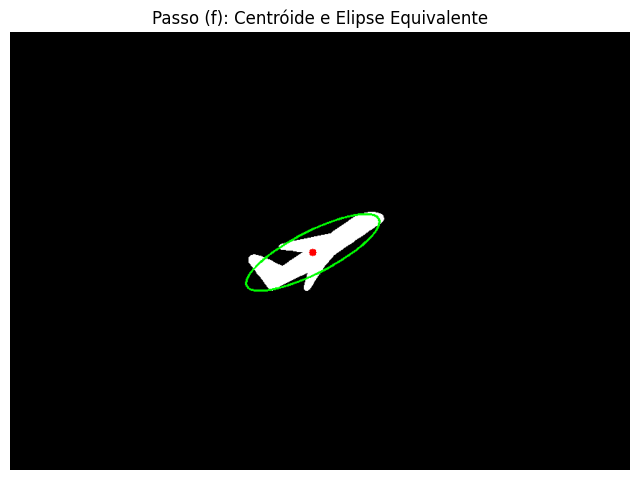

In [54]:
img = cv.imread('aviao_ed.png', cv.IMREAD_GRAYSCALE)
if img is None:
    sys.exit("Erro: Imagem não encontrada.")

ret, img_binaria = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
M = cv.moments(img_binaria)

if M['m00'] > 0:
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])

    area = M['m00']
    mu20_n = M['mu20'] / area
    mu02_n = M['mu02'] / area
    mu11_n = M['mu11'] / area

    theta = 0.5 * np.arctan2(2 * mu11_n, mu20_n - mu02_n)
    theta_deg = np.degrees(theta)

    delta = np.sqrt((mu20_n - mu02_n)**2 + 4 * mu11_n**2)
    lambda1 = (mu20_n + mu02_n + delta) / 2
    lambda2 = (mu20_n + mu02_n - delta) / 2

    eixo_maior = 4 * np.sqrt(lambda1)
    eixo_menor = 4 * np.sqrt(lambda2)

    img_plot = cv.cvtColor(img_binaria, cv.COLOR_GRAY2BGR)

    cv.circle(img_plot, (cx, cy), 5, (0, 0, 255), -1)

    axes = (int(eixo_maior / 2), int(eixo_menor / 2))

    cv.ellipse(img_plot, (cx, cy), axes, theta_deg, 0, 360, (0, 255, 0), 2)

    plt.figure(figsize=(8, 8))
    plt.imshow(cv.cvtColor(img_plot, cv.COLOR_BGR2RGB))
    plt.title("Passo (f): Centróide e Elipse Equivalente")
    plt.axis('off')
    plt.show()

else:
    print("Erro: Área zero.")